<a href="https://colab.research.google.com/github/akki0894/ARIMA-Model/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,week,sales_value
0,1,93
1,2,92
2,3,92
3,4,90
4,5,87


Its a weekly Sales data 

# Quick Plot of the data

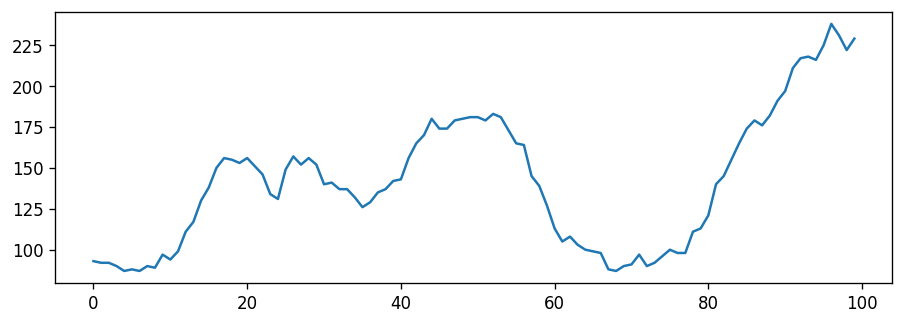

In [ ]:
df.sales_value.plot()
plt.show()

# Check for AutoCorrelation

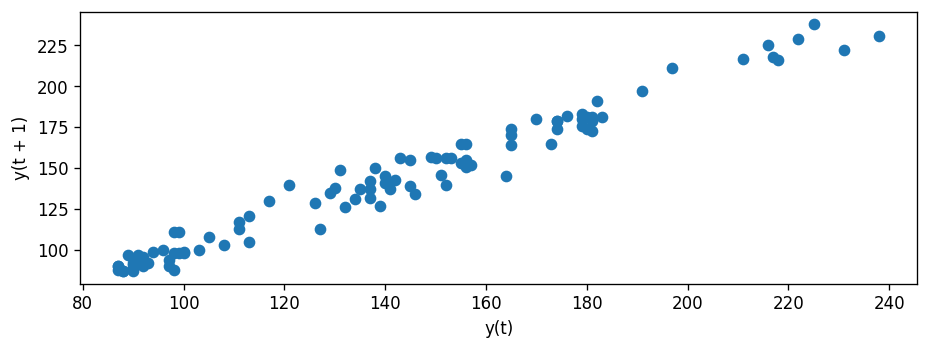

In [ ]:
from pandas.plotting import lag_plot

lag_plot(df.sales_value)
plt.show()

We can understand that the present lag is associated with the previous lag

# Finding the order of Differencing(d)

In [ ]:
from statsmodels.tsa.stattools import adfuller
 
result = adfuller(df.sales_value.dropna())

print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistics: -1.941395
p-value: 0.312845


Since p-value is greater than the significance level, let's difference the series

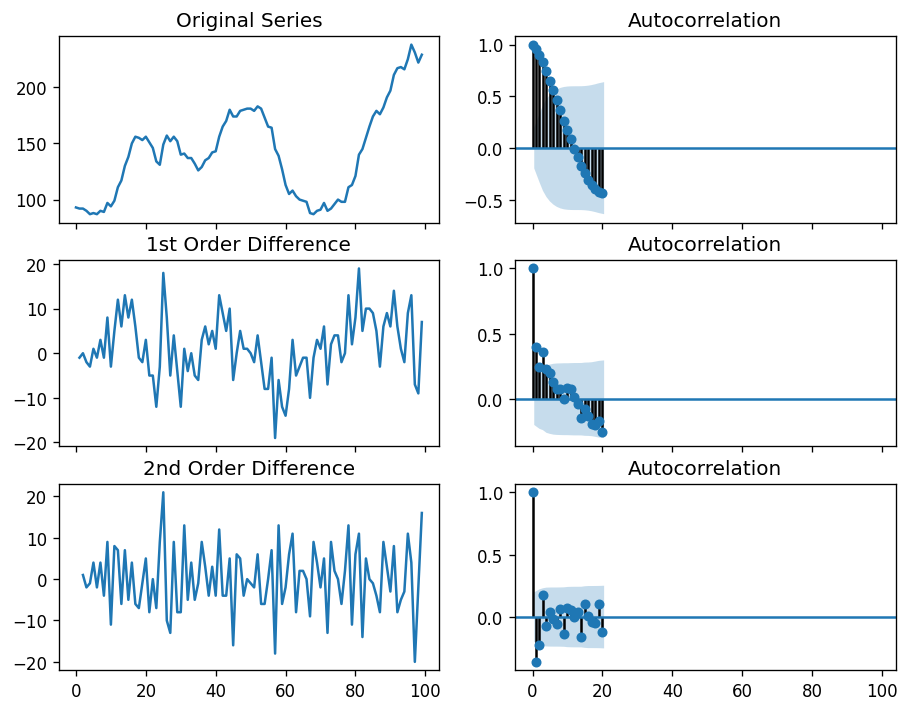

In [55]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig,axes = plt.subplots(3,2,sharex = True)
axes[0,0].plot(df.sales_value); axes[0,0].set_title('Original Series')
plot_acf(df.sales_value, ax=axes[0, 1])


# 1st Differencing
axes[1, 0].plot(df.sales_value.diff()); axes[1, 0].set_title('1st Order Difference')
plot_acf(df.sales_value.diff().dropna(), ax=axes[1,1])


#2nd Differencing
axes[2,0].plot(df.sales_value.diff().diff()); axes[2,0].set_title('2nd Order Difference')
plot_acf(df.sales_value.diff().diff().dropna(), ax=axes[2,1])

plt.show()

Lets take 1st Order Difference

# Finding the order of the AR term (p)

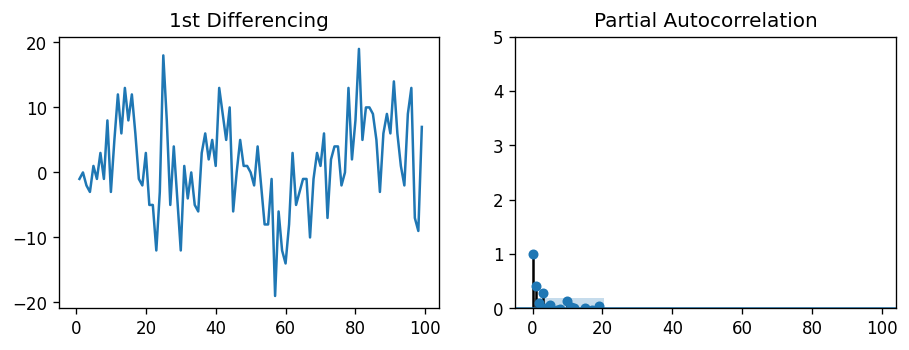

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig,axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.sales_value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.sales_value.diff().dropna(), ax=axes[1])

plt.show()

If we see from above Partial Autocorrelation graph the 1st order and more importantly its the first one crossing above the P-value hence we are going forward with 1st order.

# Finding the order of the MA term (q)

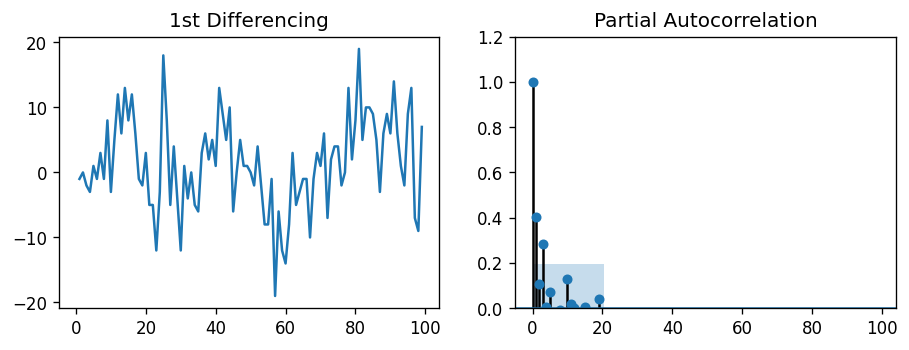

In [ ]:
fig,axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.sales_value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_pacf(df.sales_value.diff().dropna(), ax=axes[1])

plt.show()

Similarly here 1st order is selected

# Building the ARIMA model



In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df.sales_value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.sales_value   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -322.947
Method:                       css-mle   S.D. of innovations              6.307
Date:                Thu, 16 Dec 2021   AIC                            653.893
Time:                        04:28:21   BIC                            664.274
Sample:                             1   HQIC                           658.093
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.3015      1.573      0.827      0.410      -1.782       4.385
ar.L1.D.sales_value     0.8247      0.102      8.069      0.000       0.624       1.025
ma.L1.D.sales_va

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df.sales_value, order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.sales_value   No. Observations:                   99
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -322.854
Method:                       css-mle   S.D. of innovations              6.301
Date:                Thu, 16 Dec 2021   AIC                            655.709
Time:                        04:28:21   BIC                            668.684
Sample:                             1   HQIC                           660.958
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.3140      1.585      0.829      0.409      -1.792       4.420
ar.L1.D.sales_value     0.9115      0.221      4.121      0.000       0.478       1.345
ar.L2.D.sales_va

The AIC and BIC values are lower with order (1,1,1) and any change in them is not improving my AIC and BIC, hence sticking with (1,1,1) 

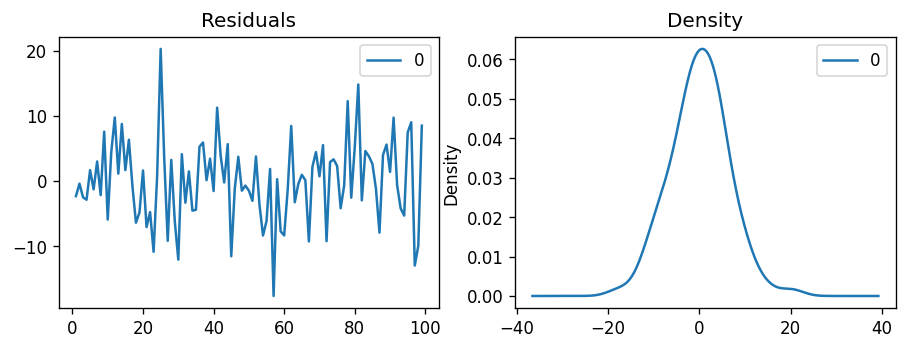

In [ ]:
# Plot residual errors

residuals = pd.DataFrame(model_fit.resid)
fig, ax =plt.subplots(1,2)
residuals.plot(title = 'Residuals', ax=ax[0])
residuals.plot(kind = 'kde', title='Density', ax=ax[1])
plt.show()

# Actual Vs Fitted

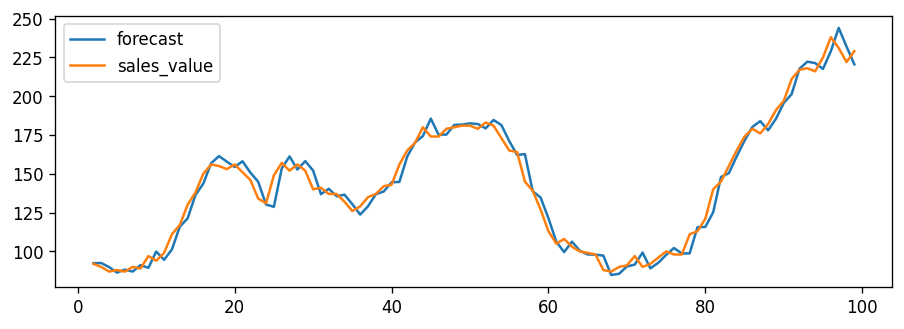

In [ ]:
model_fit.plot_predict(dynamic=False)
plt.show()

# Finding the optimal ARIMA model manually using Out-of-Time cross validation

In [ ]:
from statsmodels.tsa.stattools import acf

train = df.sales_value[:85]
test = df.sales_value[85:]


# Building the model

                             ARIMA Model Results                              
Dep. Variable:         D2.sales_value   No. Observations:                   83
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -268.626
Method:                       css-mle   S.D. of innovations              6.057
Date:                Thu, 16 Dec 2021   AIC                            549.252
Time:                        04:28:24   BIC                            563.765
Sample:                             2   HQIC                           555.083
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0301      0.080      0.378      0.707      -0.126       0.186
ar.L1.D2.sales_value     0.3142      0.107      2.946      0.004       0.105       0.523
ar.L2.D2.sal

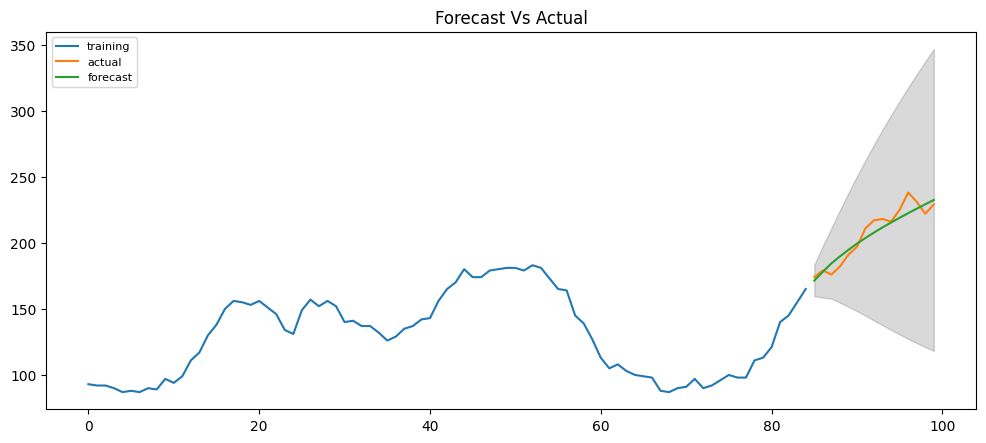

In [ ]:
model = ARIMA(train,order=(3,2,1))
fitted = model.fit(disp=-1)
print(fitted.summary())

#Forecast
fc,se,conf = fitted.forecast(15, alpha=0.05) 

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:,0], index=test.index)
upper_series  = pd.Series(conf[:,1], index=test.index)

#Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index,lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast Vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Order (3,2,1) was giving the best AIC, BIC and Log-Likelihood when compared to (1,1,1)

# Accuracy metrics

In [ ]:
#Mean Absolute Percentage Error(MAPE)
#Mean Error(ME)
#Mean Absolute Error(MAE)
#Mean Percentage Error(MPE)
#Root Mean Squared Error(RMSE)
#Lag 1 Autocorrelation of Error(ACF1)
#Correlation between the Actual and the Forecast(corr)
#Min-Max Error(minmax)

def forecast_accuracy(forecast, actual):
  mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
  me = np.mean(forecast - actual)
  mae = np.mean(np.abs(forecast - actual))
  mpe = np.mean((forecast - actual)/actual)
  rmse = np.mean((forecast - actual)**2)**.5
  corr = np.corrcoef(forecast, actual)[0,1]
  mins = np.amin(np.hstack([forecast[:,None],
                            actual[:,None]]), axis=1)
  maxs = np.amax(np.hstack([forecast[:,None],
                            actual[:,None]]), axis=1)
  minmax = 1 - np.mean(mins/maxs)
  acf1 = acf(fc-test)[1]
  return({'mape':mape, 'me':me, 'mae':mae,
          'mpe':mpe, 'rmse':rmse, 'acf1':acf1,
          'corr':corr, 'minmax':minmax})
  
  
forecast_accuracy(fc, test.values)




/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'acf1': 0.5066950085590951,
 'corr': 0.9519327748668726,
 'mae': 5.771263526560669,
 'mape': 0.027499117720271762,
 'me': -1.4342457806195361,
 'minmax': 0.027128052349575715,
 'mpe': -0.005166691928344786,
 'rmse': 6.855037073965559}